In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import imageio
import math

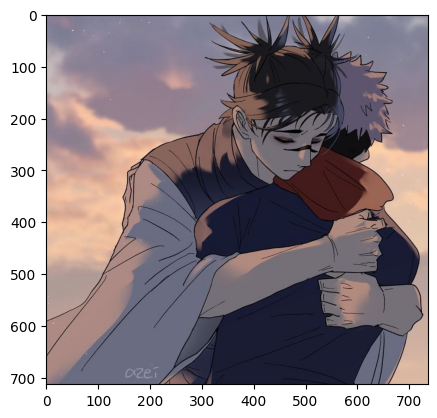

In [5]:
img = plt.imread('../img/jjk.jpeg')
imgplot = plt.imshow(img)

In [6]:
def reconstruct(img, k):
    reconstructed = np.zeros(img.shape)
    for i in range(img.shape[2]):
        U, Sigma, V_transpose = np.linalg.svd(img[:, :, i])
        reconstructed[:, :, i] = U[:, :k] @ np.diag(Sigma[:k]) @ V_transpose[:k, :]
    return reconstructed
def rescale_img(img):
    rescaled = (img - img.min()) / (img.max() - img.min())
    return rescaled

La imagen comprimida representa el 55.26% de la imagen original ( 1574304 vs 870000 )


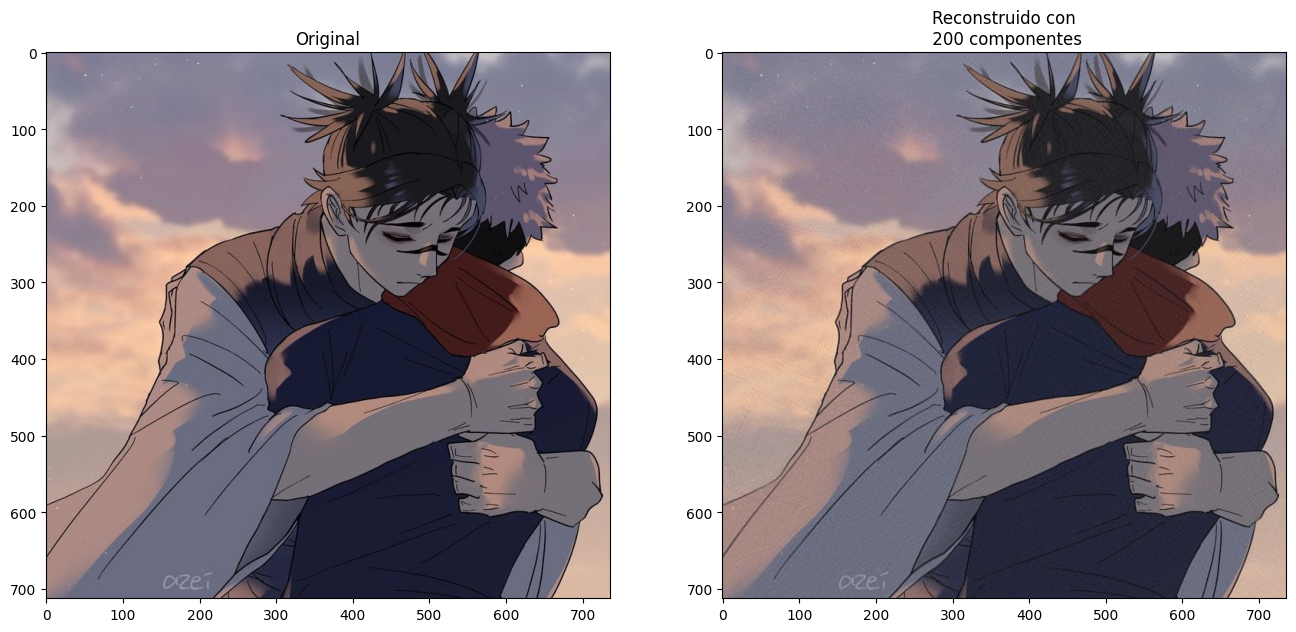

In [7]:
f, (A1,A2) = plt.subplots(nrows=1, ncols=2,figsize=(16, 11))
alto_imagen = img.shape[0]
ancho_imagen = img.shape[1]
numero_canales = 3
cantidad_componentes = 200
reconstructed = reconstruct(img, k=cantidad_componentes)

tamaño_original = alto_imagen*ancho_imagen*numero_canales
tamaño_comprimido = cantidad_componentes * (1 + alto_imagen + ancho_imagen) * numero_canales
ratio = tamaño_comprimido * 1.0 / tamaño_original
print('La imagen comprimida representa el ' + str(round(ratio * 100, 2)) + '% de la imagen original ( '+str(tamaño_original)+' vs '+str(tamaño_comprimido)+' )')

A1.set_title(f"Original")
A1.imshow(img)
A2.set_title(f"Reconstruido con\n {cantidad_componentes} componentes")
A2.imshow(rescale_img(reconstructed))

In [11]:
alto_imagen = img.shape[0]
ancho_imagen = img.shape[1]
numero_canales = 3
e = 200

porcentaje=30
while ratio==porcentaje:
  tamaño_original = alto_imagen*ancho_imagen*numero_canales
  rt = e * (1 + alto_imagen + ancho_imagen) * numero_canales
  ratio = round((rt * 1.0 / tamaño_original)*100,2)
  e=e+1

print(f'La imagen comprimida representa el {ratio}% con {e} componentes')

La imagen comprimida representa el 0.552625160070736% con 200 componentes


In [ ]:
imageio.imwrite('Comprimido.jpg', rescale_img(reconstructed) )

Actualmente ya existe otro metodo

In [16]:
def reduccion_imagen(Archivo,destino,renombre):
    from PIL import Image
    input_img = Image.open(Archivo)
    input_img.save((f'{destino}/{renombre}.jpg'), optimize=True, quality=50)

In [17]:
reduccion_imagen('../img/jjk.jpeg','../img','jjk2.jpeg')

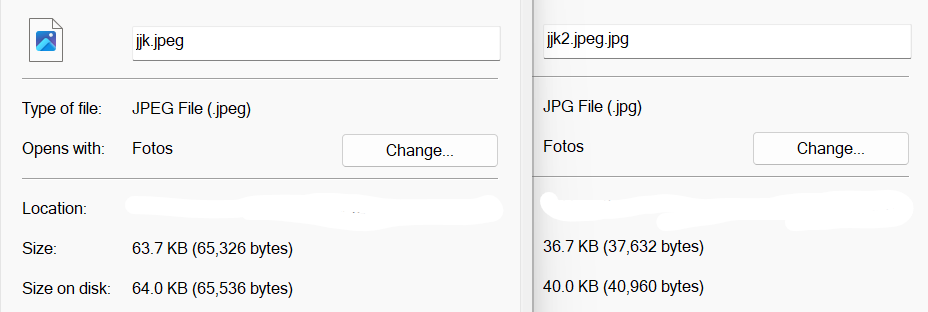